<a href="https://colab.research.google.com/github/YakiVS/API-REST-/blob/master/Coste_de_un_incidente_de_seguridad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación de datos

In [1]:
import numpy as np
x= 2 * np.random.rand(100,1)
y= 4 + 3 * x + np.random.rand(100,1)
print("longitud:", len(x))

longitud: 100


# Visualización de datos

In [2]:
import matplotlib.pyplot as plt

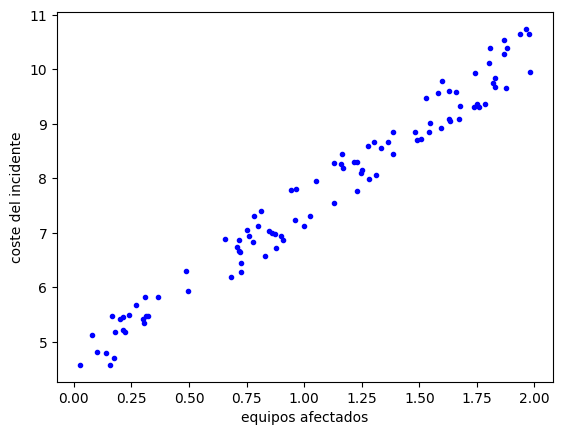

In [3]:
plt.plot(x,y,".b")
plt.xlabel("equipos afectados")
plt.ylabel("coste del incidente")
plt.show()

# Modificando el conjunto de datos

In [4]:
import pandas as pd

In [5]:
data = {'num_equipos': x.flatten(),
        'coste': y.flatten()}
df=pd.DataFrame(data)
df.head(10)

,num_equipos,coste
0,0.487674,6.307465
1,0.077559,5.129413
2,1.230982,8.310520
3,0.899037,6.944505
4,0.726726,6.274268
5,0.860932,6.990603
6,0.962113,7.230569
7,0.906527,6.870723
8,1.869730,10.277079
9,0.718148,6.672987


In [6]:
# escalando el número de equipos afectados
df['num_equipos'] = df['num_equipos']*1000
df['num_equipos'] = df['num_equipos'].astype('int')

# escalando el valor del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,num_equipos,coste
0,487,63074
1,77,51294
2,1230,83105
3,899,69445
4,726,62742
5,860,69906
6,962,72305
7,906,68707
8,1869,102770
9,718,66729


# Representación gráfica

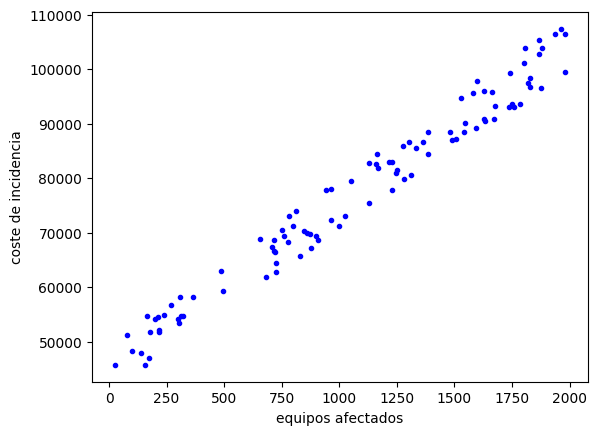

In [7]:
plt.plot(df['num_equipos'],df['coste'],'.b')
plt.xlabel('equipos afectados')
plt.ylabel('coste de incidencia')
plt.show()

# Contrucción del modelo

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# construcción del modelo y ajuste de la función hipótesis
lin_reg=LinearRegression()
lin_reg.fit(df['num_equipos'].values.reshape(-1,1),df['coste'].values)

LinearRegression()

In [10]:
# tetha 0
lin_reg.intercept_

46173.12794171256

In [11]:
# tetha 1
lin_reg.coef_

array([29.05294156])

In [12]:
# valor mínimo y máximo del conjunto de datos entrenado
x_min_max=np.array([[df['num_equipos'].min()],[df['num_equipos'].max()]])
y_train_predict=lin_reg.predict(x_min_max)

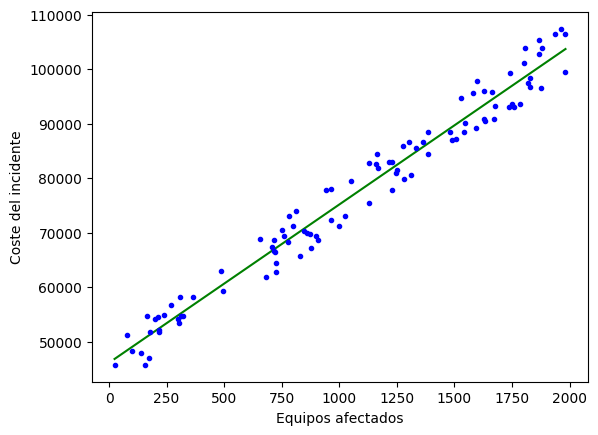

In [13]:
# representación gráfica de la función hipótesis
plt.plot(x_min_max,y_train_predict,'g-')
plt.plot(df['num_equipos'],df['coste'],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

# Comprobando el modelo con nuevos ejemplos

In [16]:
# para 1300 equipos afectados
x_new = np.array([[1300]])

# predicción del coste que tendría el incidente
coste=lin_reg.predict(x_new)

print('el coste del incidente sería:', int(coste[0]),"$")


el coste del incidente sería: 83941 $


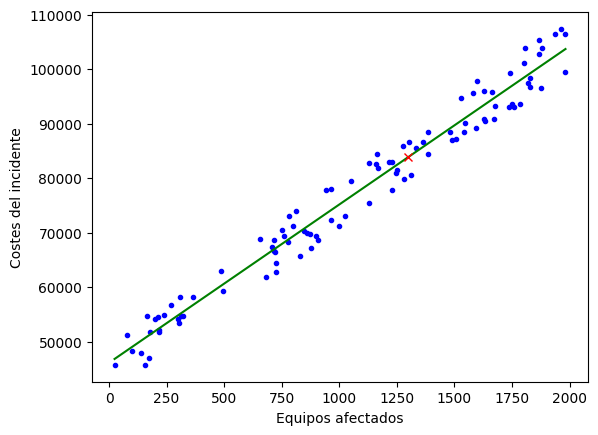

In [17]:
# realizamos la nueva representación gráfica
plt.plot(df['num_equipos'],df['coste'],'b.')
plt.plot(x_min_max,y_train_predict,'g-')
plt.plot(x_new,coste,"rx")
plt.xlabel('Equipos afectados')
plt.ylabel('Costes del incidente')
plt.show()